# Problem Statement

## We need to predict the chance of admission based on the studnts various scores

##### Features of independent variables

- GRE Score
- TOEFL Score
- University rating
- SOP
- LOR
- CGPA
- Research

Label Target
- Chance of admit

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

import seaborn as sns

import pickle

import warnings
warnings.filterwarnings('ignore')


In [3]:
#Read csv file and convert it into dataframe
data = pd.read_csv(r"C:\Users\admin\Desktop\jupyter practice\Admission_Prediction.csv")

In [8]:
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337.0,118.0,4.0,4.5,4.5,9.65,1,0.92
1,324.0,107.0,4.0,4.0,4.5,8.87,1,0.76
2,NaN,104.0,3.0,3.0,3.5,8.00,1,0.72
3,322.0,110.0,3.0,3.5,2.5,8.67,1,0.80
4,314.0,103.0,2.0,2.0,3.0,8.21,0,0.65


In [5]:
data.shape

(500, 9)

# Data Pre-Processing Steps




## 1. Data cleaning


   


## 2. EDA (Analysis)


## 3. Finding and treating outliers (if any)


## 4. Feature selection for model building


## 5. Data Standardization

## 6. Train test split

In [6]:
#Data preprocessing
### 1. EDA (Analysis)
### 2. Data cleaning
### 3. Finding and treating outliers (if any)
### 4. Feature selection for model building (Dropping unwanted columns)

data = data.drop(columns = ['Serial No.'])
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337.0,118.0,4.0,4.5,4.5,9.65,1,0.92
1,324.0,107.0,4.0,4.0,4.5,8.87,1,0.76
2,NaN,104.0,3.0,3.0,3.5,8.00,1,0.72
3,322.0,110.0,3.0,3.5,2.5,8.67,1,0.80
4,314.0,103.0,2.0,2.0,3.0,8.21,0,0.65


In [7]:
#Understand the data at high level. Check the statistics of the data set
data.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,485.000000,490.000000,485.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.558763,107.187755,3.121649,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.274704,6.112899,1.146160,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [9]:
#Fill the null values
data['University Rating'] = data['University Rating'].fillna(data['University Rating'].mode()[0])
data['TOEFL Score'] = data['TOEFL Score'].fillna(data['TOEFL Score'].mean())
data['GRE Score'] = data['GRE Score'].fillna(data['GRE Score'].mean())

In [10]:
#verify if NaN's are filled
data.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.558763,107.187755,3.118000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.103952,6.051338,1.128993,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,309.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,316.558763,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,324.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


Let's visualize the data and analyze the relationship between independent and dependant variables

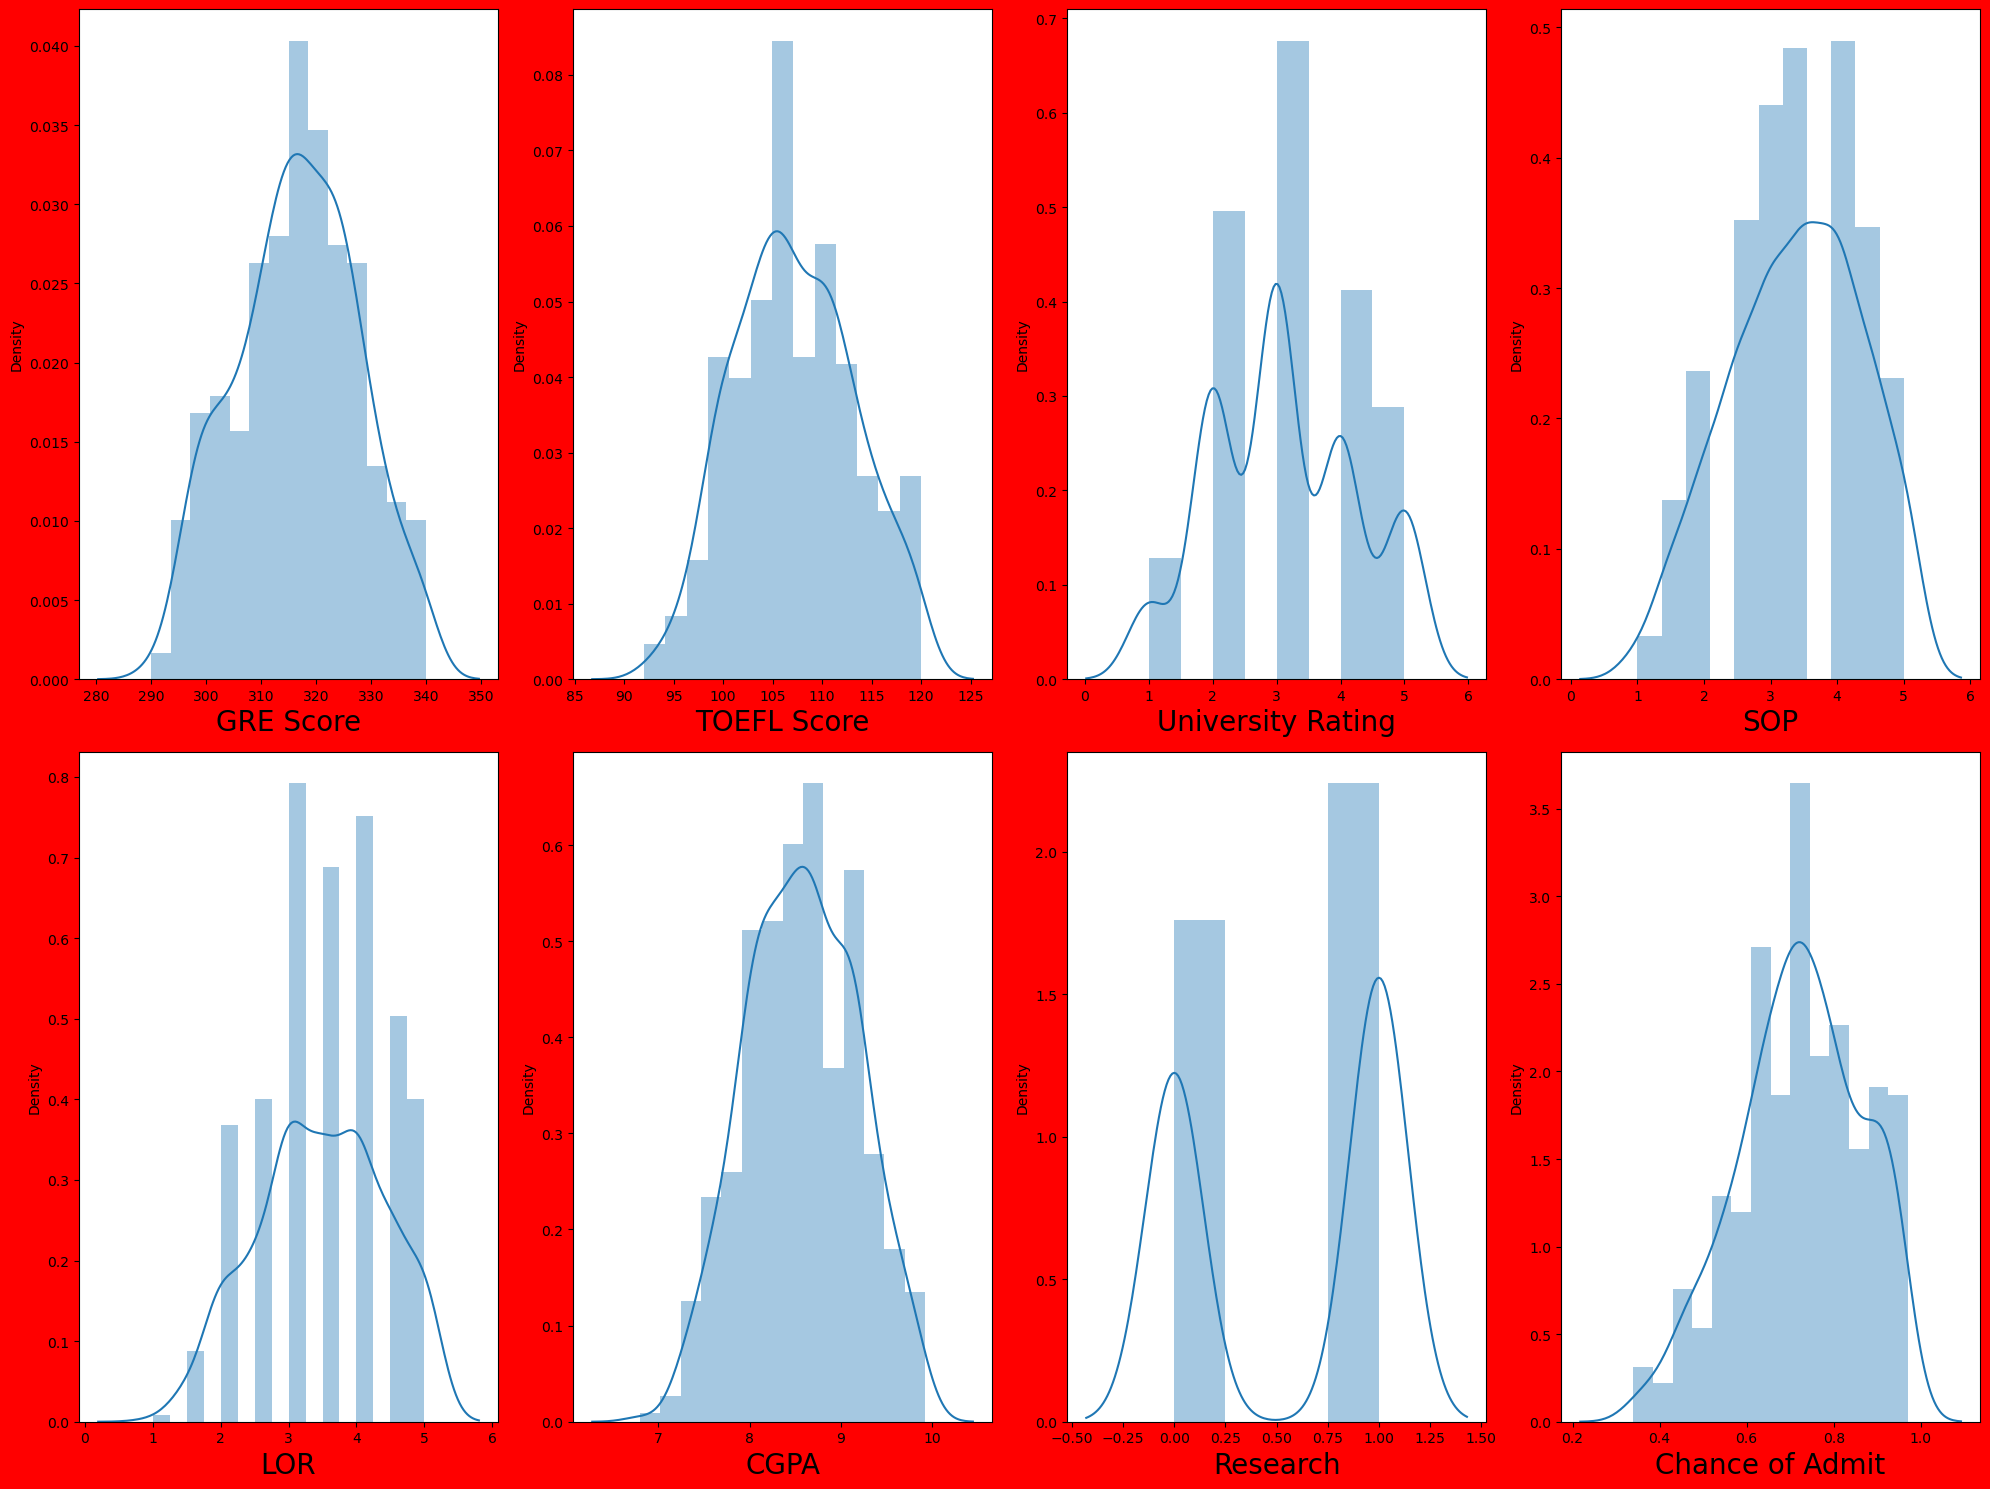

In [11]:
#Let's see how data is distributed for every column

plt.figure(figsize = (20,15), facecolor = 'red')
plotnumber = 1

for column in data:
    if plotnumber<=8:
        ax = plt.subplot(2,4,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column, fontsize = 20)

    plotnumber+=1

plt.tight_layout()

The data distribution looks good hence there is no skewness.

Let's observe the relationship between independent and dependant variables.

In [12]:
#Divide data sets into features and labels
y = data['Chance of Admit']
X = data.drop(columns = ['Chance of Admit'])

In [13]:
y

0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
       ... 
495    0.87
496    0.96
497    0.93
498    0.73
499    0.84
Name: Chance of Admit, Length: 500, dtype: float64

In [14]:
X

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337.000000,118.0,4.0,4.5,4.5,9.65,1
1,324.000000,107.0,4.0,4.0,4.5,8.87,1
2,316.558763,104.0,3.0,3.0,3.5,8.00,1
3,322.000000,110.0,3.0,3.5,2.5,8.67,1
4,314.000000,103.0,2.0,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...
495,332.000000,108.0,5.0,4.5,4.0,9.02,1
496,337.000000,117.0,5.0,5.0,5.0,9.87,1
497,330.000000,120.0,5.0,4.5,5.0,9.56,1
498,312.000000,103.0,4.0,4.0,5.0,8.43,0


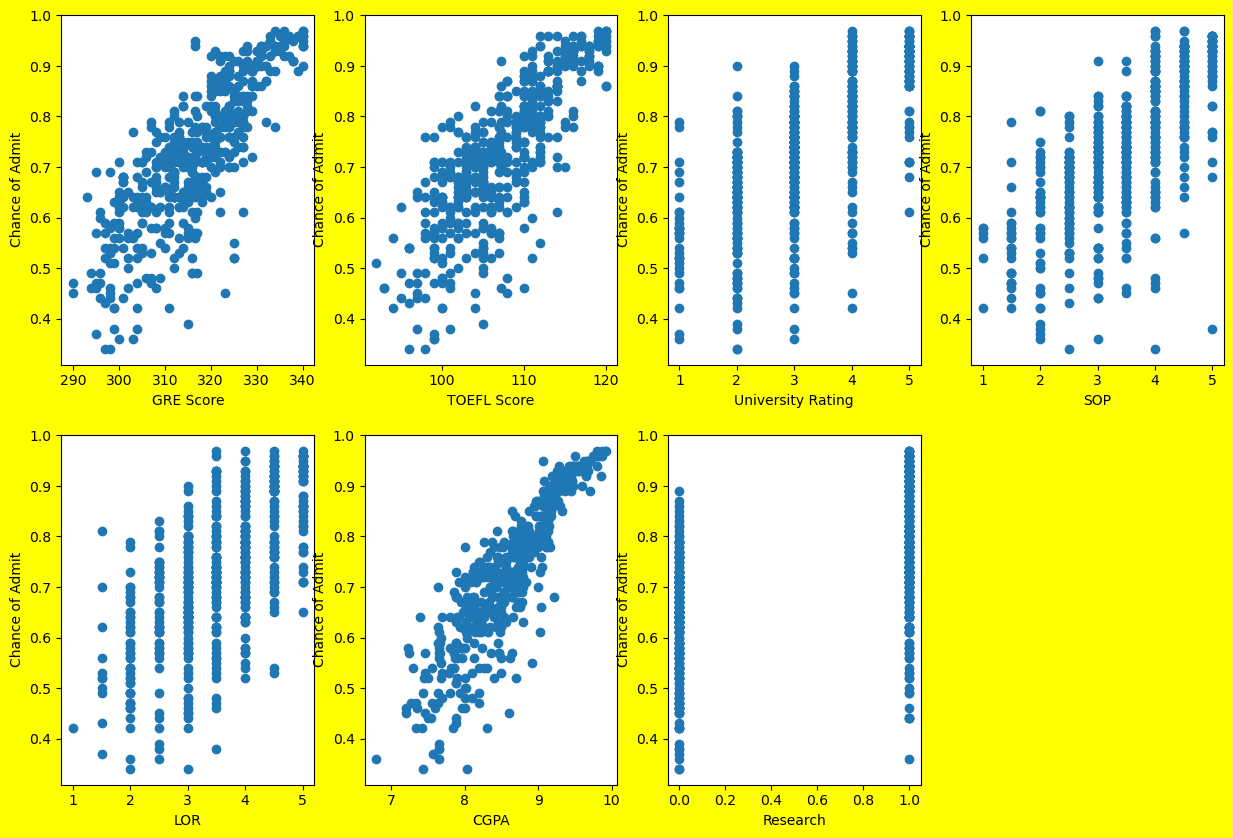

In [15]:
#Visualization relationship
plt.figure(figsize=(15,10), facecolor='yellow')
plotnumber = 1

for column in X.columns:
    if plotnumber <= 8:
        ax = plt.subplot(2, 4, plotnumber)
        plt.scatter(X[column], y)  # Ensure y is a valid target variable
        plt.xlabel(column, fontsize=10)
        plt.ylabel('Chance of Admit', fontsize=10)
        plotnumber += 1

plt.show()

The relationship between the dependent and independent variables looks fairly linear. Thus our linearity assumption is satisfied.

In [16]:
#Data scaling. Formula Z = (X - Mean)/std
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [17]:
X_scaled

array([[ 1.84274116e+00,  1.78854223e+00,  7.82009548e-01, ...,
         1.09894429e+00,  1.77680627e+00,  8.86405260e-01],
       [ 6.70814288e-01, -3.10581135e-02,  7.82009548e-01, ...,
         1.09894429e+00,  4.85859428e-01,  8.86405260e-01],
       [ 5.12433309e-15, -5.27312752e-01, -1.04622593e-01, ...,
         1.73062093e-02, -9.54042814e-01,  8.86405260e-01],
       ...,
       [ 1.21170361e+00,  2.11937866e+00,  1.66864169e+00, ...,
         1.63976333e+00,  1.62785086e+00,  8.86405260e-01],
       [-4.10964364e-01, -6.92730965e-01,  7.82009548e-01, ...,
         1.63976333e+00, -2.42366993e-01, -1.12815215e+00],
       [ 9.41258951e-01,  9.61451165e-01,  7.82009548e-01, ...,
         1.09894429e+00,  7.67219636e-01, -1.12815215e+00]])

In [18]:
help(LinearRegression)

Help on class LinearRegression in module sklearn.linear_model._base:

class LinearRegression(sklearn.base.MultiOutputMixin, sklearn.base.RegressorMixin, LinearModel)
 |  LinearRegression(*, fit_intercept=True, copy_X=True, n_jobs=None, positive=False)
 |  
 |  Ordinary least squares Linear Regression.
 |  
 |  LinearRegression fits a linear model with coefficients w = (w1, ..., wp)
 |  to minimize the residual sum of squares between the observed targets in
 |  the dataset, and the targets predicted by the linear approximation.
 |  
 |  Parameters
 |  ----------
 |  fit_intercept : bool, default=True
 |      Whether to calculate the intercept for this model. If set
 |      to False, no intercept will be used in calculations
 |      (i.e. data is expected to be centered).
 |  
 |  copy_X : bool, default=True
 |      If True, X will be copied; else, it may be overwritten.
 |  
 |  n_jobs : int, default=None
 |      The number of jobs to use for the computation. This will only provide
 |  

Let's go ahead and use linear regression and see how good it fits our data. But first, let's split our data into train and test.

In [19]:
#split our data into train and test.Model will be built on training data and tested on tested data.
x_train, x_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.25, random_state =348)
y_train.head()

459    0.89
174    0.87
399    0.95
374    0.39
355    0.73
Name: Chance of Admit, dtype: float64

### Model Instantiating and Training

In [20]:
regression = LinearRegression()
regression.fit(x_train,y_train)

LinearRegression()

In [21]:
#Predict the chance of admission given features
data.tail(2)

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
498,312.0,103.0,4.0,4.0,5.0,8.43,0,0.73
499,327.0,113.0,4.0,4.5,4.5,9.04,0,0.84


In [22]:
#Since we have already fit the scaler so we can trasnform the data
print ('Chance of Admission is : ', regression.predict(scaler.transform([[327.0, 113.0, 4.0, 4.5, 4.5, 9.04, 0]])))

Chance of Admission is :  [0.82445851]


### You can save the model and later you can use it for prediction.

In [23]:
#saving the model to the local system use the below code 
#pickle.dump(regression,open('reg_model','wb'))

In [25]:
#prediction using the saved model
#loaded_model = pickle.load(open('reg_model','wb'))

# a = loaded_model.predict(scaler.transform([[value]]))
# a

### Let's check how well model fits on train data.

In [28]:
#Adjusted R2-score
regression.score(x_train,y_train)

0.82855357382842

### Let's check how well model fits on test data.

In [29]:
regression.score(x_test,y_test)

0.7928310580010802

### Let's plot and visualize

In [30]:
x_test[1]

array([2.11318582, 0.79603295, 0.78200955, 1.64240413, 1.09894429,
       1.79335687, 0.88640526])

In [33]:
y_pred = regression.predict(x_test)
y_pred

array([0.8207641 , 0.94873455, 0.91113259, 0.61044355, 0.66137595,
       0.60352359, 0.83223756, 0.63090419, 0.78083483, 0.76003632,
       0.61343331, 0.5171975 , 0.84481161, 0.47026296, 0.9080331 ,
       0.62012908, 0.73074873, 0.63424789, 0.82329681, 0.57632803,
       0.80849253, 0.75415425, 0.65115419, 0.53199278, 0.55202691,
       0.49318412, 0.8954953 , 0.77677743, 0.72036651, 0.42326242,
       0.82315696, 0.79339286, 0.62530834, 0.67328918, 0.77417537,
       0.63745613, 0.80739236, 0.78788545, 0.58911428, 0.66156995,
       0.73593055, 0.59762008, 0.86327735, 0.94441147, 0.98184889,
       0.51308745, 0.77626965, 0.92424654, 0.63718128, 0.96940982,
       0.65572611, 0.63867889, 0.81411786, 0.73643354, 0.68692311,
       0.55261258, 0.43652872, 0.64497596, 0.68382796, 0.68701788,
       0.86409285, 0.67198884, 0.78792379, 0.65534022, 0.95792159,
       0.61596565, 0.72449619, 0.53769901, 0.59184804, 0.78917924,
       0.74441132, 0.6447335 , 0.99270469, 0.66219368, 0.65200

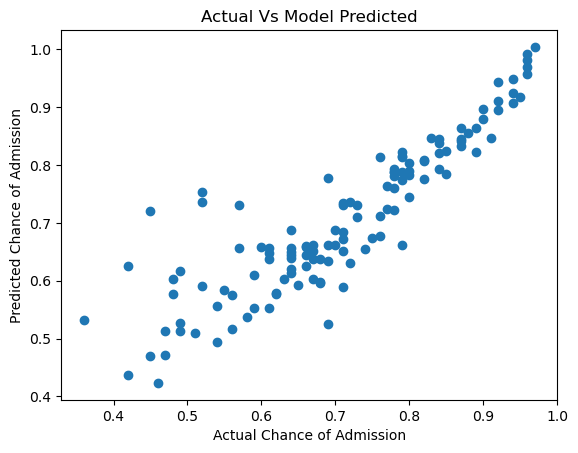

In [34]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual Chance of Admission')
plt.ylabel('Predicted Chance of Admission')
plt.title('Actual Vs Model Predicted')
plt.show()

### Model Evaluation 

####
- Mean Absolute error(MAE): - Represents avg error
- Mean Sqared error(MSA): - Similar to MAE but noise is exaggerated and large errors are punished. It is harder to interpret that MAE thats not in base units, however it is generally more popular.
- Root mean square error(RSME): - Most popular metric,similar to MSE, however, the result is square rooted to make it more interpretable as it's in base units. It is recommended that RMSE used as the primary metric to interpret your model. 

In [35]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [36]:
y_pred = regression.predict(x_test)

In [37]:
#MAE
mean_absolute_error(y_test,y_pred)

0.04421359936541998

In [39]:
#MSA
mean_squared_error(y_test,y_pred)

0.0043091723323515985

In [40]:
#RSME
np.sqrt(mean_squared_error(y_test,y_pred))

0.06564428636485889

## Successfully completed building Linear Regression Model

### Now using Regularization to check our model is overfitted or not.

### 
- LASSO
- RIDGE

In [41]:
from sklearn.linear_model import Ridge,Lasso, RidgeCV, LassoCV

## LASSO Regularization

In [44]:
'''
LassoCV will return best alpha after max iteration.

alphas It is a learning rate.

Iteration:- Iteration is a single cycle of model training where the algorithm uses the available data to update the model parameters.
During each iteration, the algorithm tries to improve the model's performance by adjusting its parameters to better fit the training data.
This process is repeated multiple times until the algorithm finds the best set of parameters that minimize the error or maximize the accuracy
of the model on the training data.

Normalize:- A Most common techniques is called min-max scaling. In min-max scaling, each feature is transformed to a range between 0 and 1. This is
done by subtracting the minimum value of the feature from each value in the feature, and then dividing the result by the range of the feature (i.e.,
the difference between the maximum and minimum values).
'''

lasscv = LassoCV(alphas = None, max_iter = 10) 
lasscv.fit(x_train, y_train)

LassoCV(max_iter=10)

In [50]:
#Best alpha parameter
alpha = lasscv.alpha_
alpha

0.0006090008804969982

In [51]:
#Now that we have best parameter, let's use Lasso Regression and see how best our data has fitted before
lasso_reg = Lasso(alpha)
lasso_reg.fit(x_train,y_train)

Lasso(alpha=0.0006090008804969982)

In [52]:
lasso_reg.score(x_test,y_test)

0.7938036352038629

## Using Ridge Regression Model

In [53]:
np.arange(0.001, 0.1, 0.01)

array([0.001, 0.011, 0.021, 0.031, 0.041, 0.051, 0.061, 0.071, 0.081,
       0.091])

In [54]:
#RidgeCV will return best alpha and coefficients after performing 10 cross-validations
ridgecv = RidgeCV(alphas = np.arange(0.001, 0.1, 0.01))
ridgecv.fit(x_train, y_train)

RidgeCV(alphas=array([0.001, 0.011, 0.021, 0.031, 0.041, 0.051, 0.061, 0.071, 0.081,
       0.091]))

In [56]:
ridgecv.alpha_

0.09099999999999998

In [57]:
ridge_model = Ridge(alpha = ridgecv.alpha_)
ridge_model.fit(x_train, y_train)

Ridge(alpha=0.09099999999999998)

In [58]:
ridge_model.score(x_test,y_test)

0.7928351268338166

##### We get around same R square using Ridge and Lasso Regression so its safe to say that there is no overfitting.